In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
stock = pd.read_csv('C:/Users/Connor/Cs5804/mini-project-stock-ML/SPY_Trading_Project/data/raw/SPY.csv')

In [57]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume,Date_Num
count,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000,7.786000e+03,7786.000000
mean,170.450003,171.472339,169.326798,170.458874,141.620249,8.447759e+07,5643.219497
std,106.640696,107.212931,106.034684,106.668401,112.089264,9.233423e+07,3261.680757
min,43.343750,43.531250,42.812500,43.406250,24.464319,5.200000e+03,0.000000
25%,105.280623,106.247498,104.450625,105.285000,70.398636,1.002330e+07,2813.250000
50%,132.178749,132.987190,131.160004,132.061249,93.180195,6.315320e+07,5645.500000
75%,210.257496,211.015003,209.307499,210.340000,180.639774,1.159852e+08,8468.750000
max,479.220001,479.980011,476.260010,477.709991,475.213501,8.710263e+08,11291.000000


In [65]:
stock['Date'] = pd.to_datetime(stock['Date'])
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(stock, columns=['Date', 'Close'])

df.head()

,Date,Close
0,1993-01-29,43.93750
1,1993-02-01,44.25000
2,1993-02-02,44.34375
3,1993-02-03,44.81250
4,1993-02-04,45.00000


In [66]:
df.isna().values.any()

False

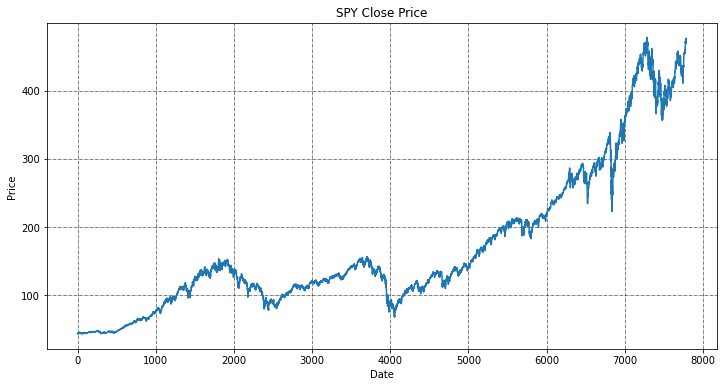

In [67]:
stock['Close'].plot(figsize=(12,6))
plt.title('SPY Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

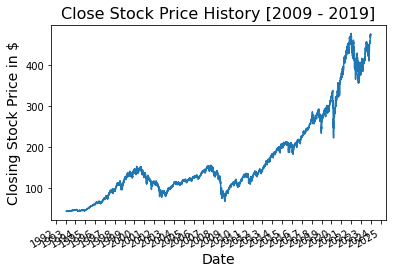

In [69]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Set figure title
plt.title('Close Stock Price History [1993 - 2025]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()


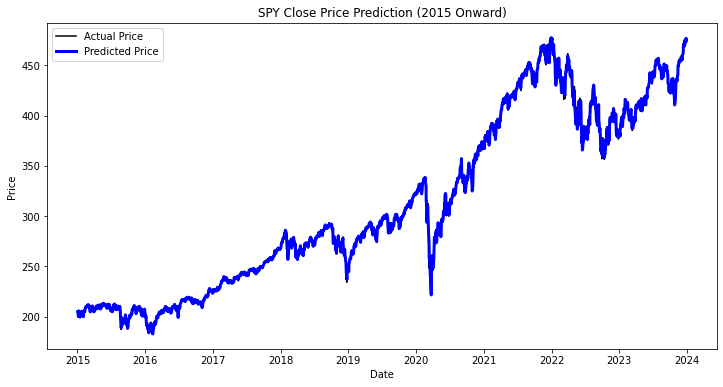

In [85]:
    # Convert the 'Date' column to datetime format
    stock['Date'] = pd.to_datetime(stock['Date'])
    
    # Filter the data for training (1993-2015) and testing (2015 onward)
    train_data = stock[stock['Date'] < '2015-01-01']
    test_data = stock[stock['Date'] >= '2015-01-01']
    
    # Define the features and target variable
    features = ['Open', 'High', 'Low', 'Volume', 'Date_Num']
    X_train = train_data[features]
    y_train = train_data['Close']
    X_test = test_data[features]
    y_test = test_data['Close']
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Plot the actual vs predicted prices for the test data (2015 onward)
    plt.figure(figsize=(12,6))
    plt.plot(test_data['Date'], y_test, color='black', label='Actual Price')
    plt.plot(test_data['Date'], y_pred, color='blue', linewidth=3, label='Predicted Price')
    plt.title('SPY Close Price Prediction (2015 Onward)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()



In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.8426586675873261
Mean Squared Error: 1.791024049239913
Root Mean Squared Error: 1.33829146647504
R-squared: 0.9997618659451812


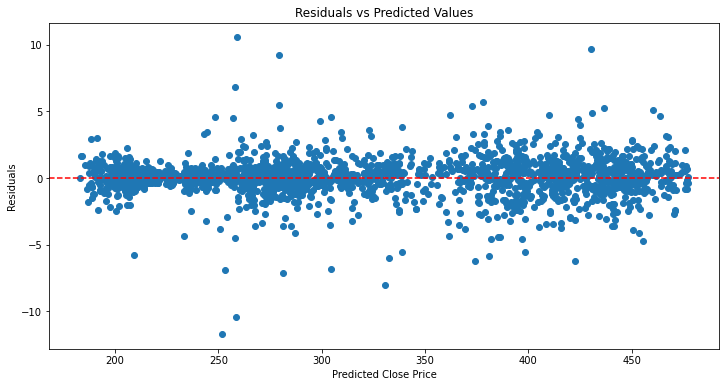

In [87]:
residuals = y_test - y_pred

plt.figure(figsize=(12,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.show()


In [89]:
#Understanding the feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


    Feature   Coefficient
1      High  8.512300e-01
2       Low  7.811463e-01
4  Date_Num  1.691674e-05
3    Volume -3.042983e-10
0      Open -6.330225e-01


(7786, 2)

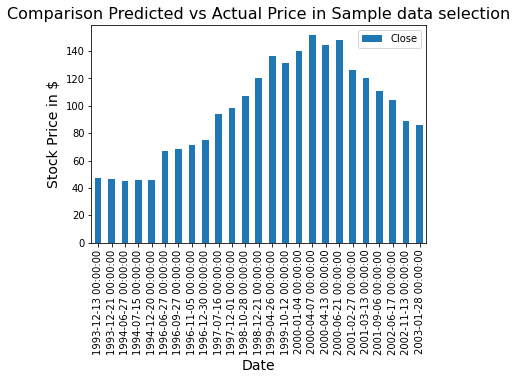

In [79]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()

df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

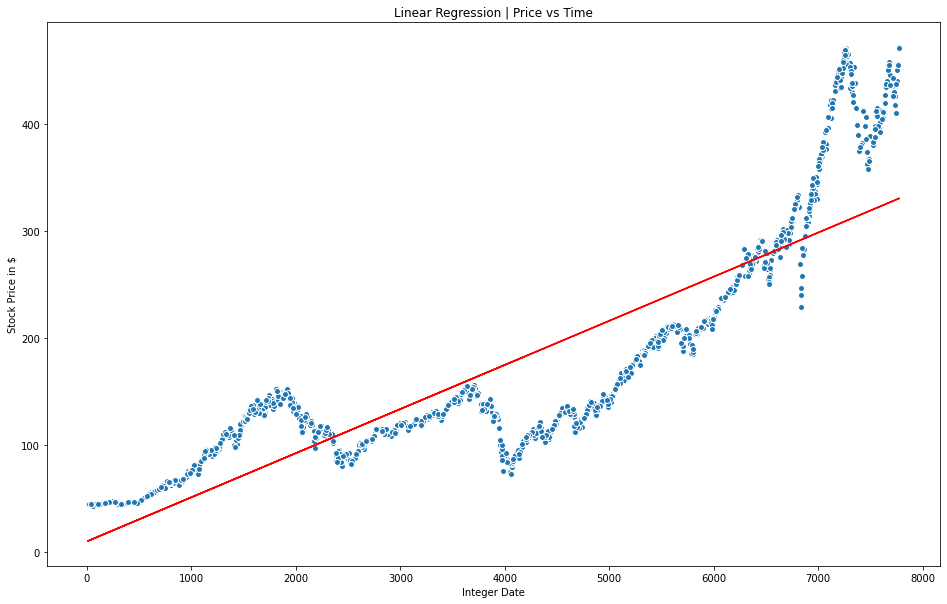

In [80]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()